In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Collecting

In [5]:
url = "https://drive.google.com/uc?id=1iZRalzJ8Lm5yf1xZxELWJRI8fJKEDRWa" # kalau pakai drive https://drive.google.com/file/d/1iZRalzJ8Lm5yf1xZxELWJRI8fJKEDRWa/view?usp=sharing
df = pd.read_csv(url)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## EDA

### Analisis Distribusi

#### Distribusi Target

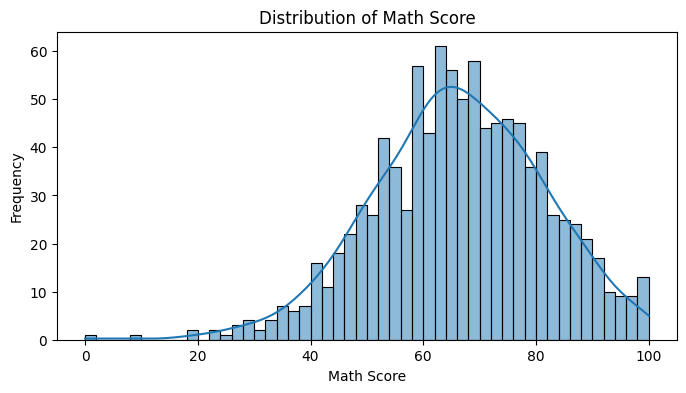

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['math score'], bins=50, kde=True)
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

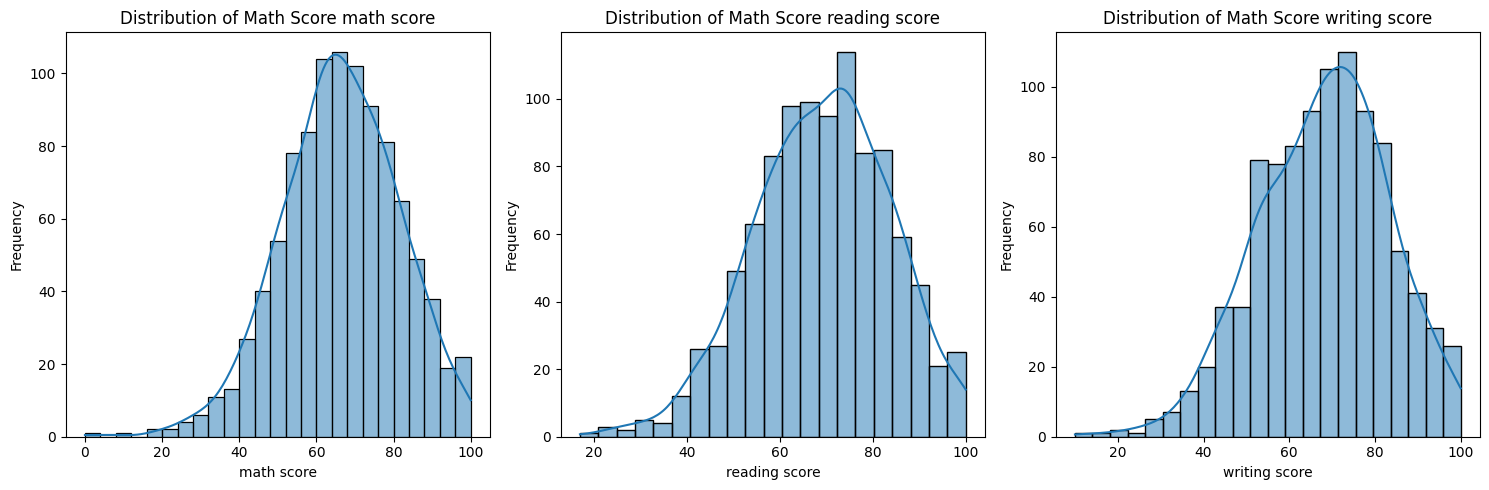

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Math Score']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of Math Score {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Dsitribusi Kolom Kategorik

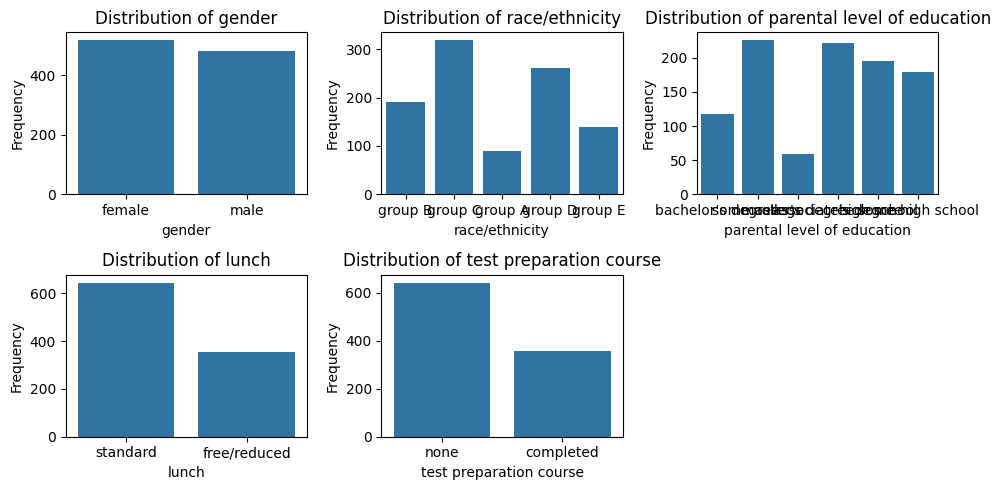

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 5)) # Adjusted figure height for 2 rows
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1) # Changed to 2 rows, 3 columns
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}') # Simplified title for categorical plots
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### EDA Lanjutan

Rata-rata Math Score per Gender:
   gender  math score
0  female   63.633205
1    male   68.728216


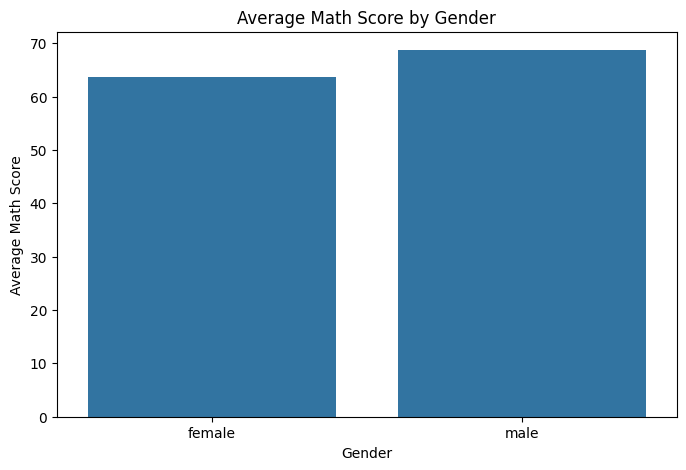

In [16]:
average_score_by_gender = df.groupby('gender')['math score'].mean().reset_index()
print("Rata-rata Math Score per Gender:")
print(average_score_by_gender)

plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='math score', data=average_score_by_gender)
plt.title('Average Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Math Score')
plt.show()

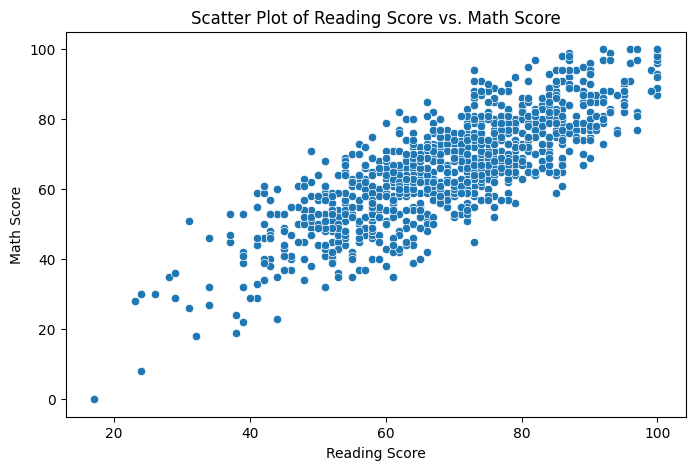

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='reading score', y='math score', data=df)
plt.title('Scatter Plot of Reading Score vs. Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

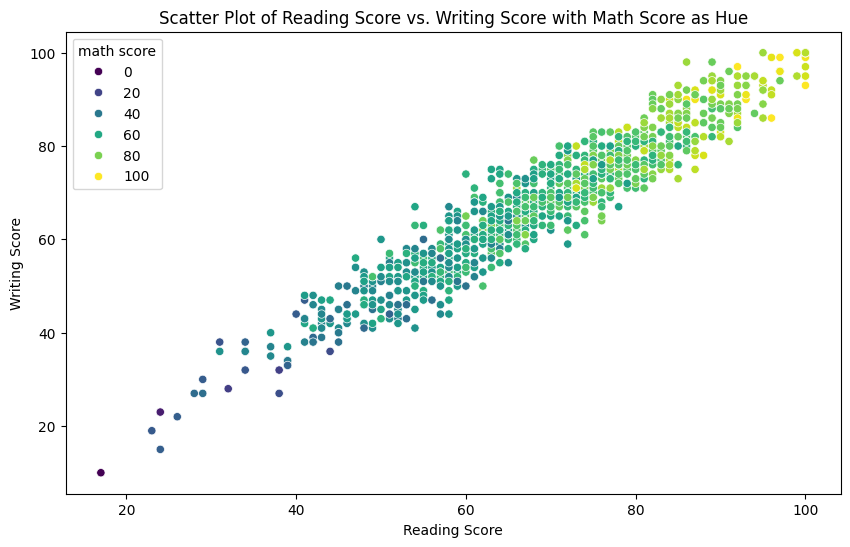

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reading score', y='writing score', hue='math score', data=df, palette='viridis')
plt.title('Scatter Plot of Reading Score vs. Writing Score with Math Score as Hue')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

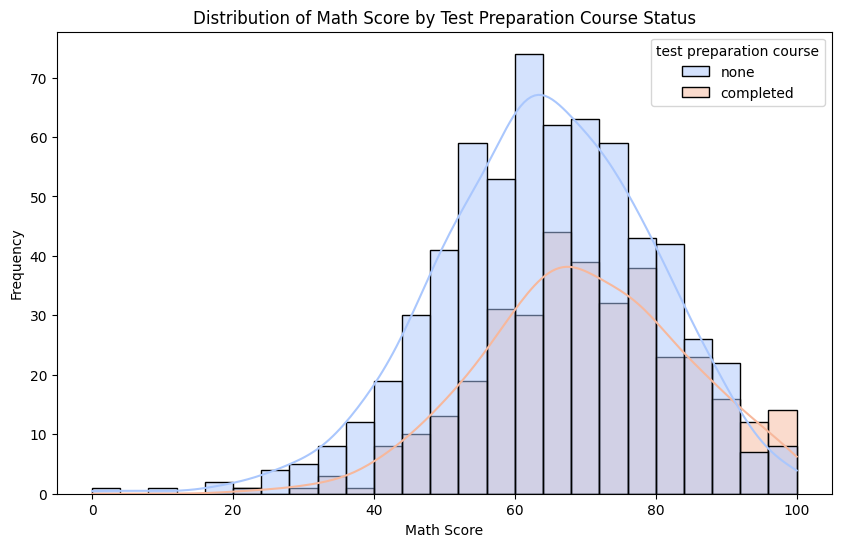

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='math score', hue='test preparation course', kde=True, palette='coolwarm')
plt.title('Distribution of Math Score by Test Preparation Course Status')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
cols_to_encode = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


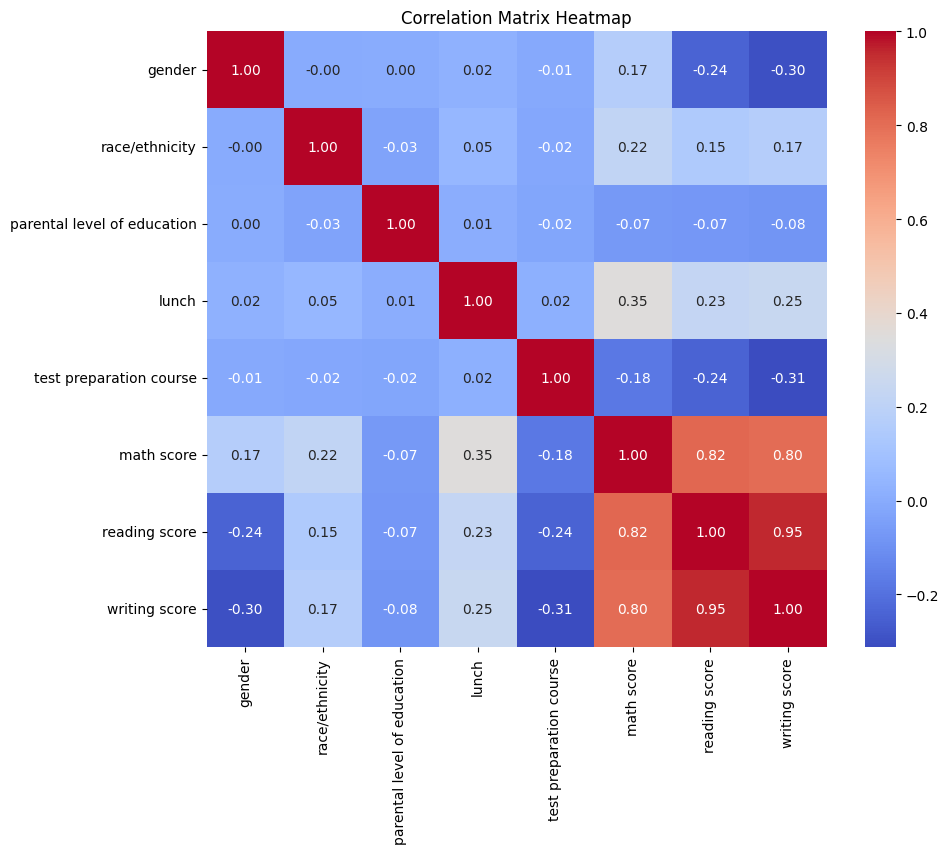

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data Splitting

In [24]:
X = df.drop('math score', axis=1)
y = df['math score']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 28.275284506327335
Root Mean Squared Error: 5.317450940660133
Mean Absolute Error: 4.1301450780040545
R-squared: 0.8838026201112223


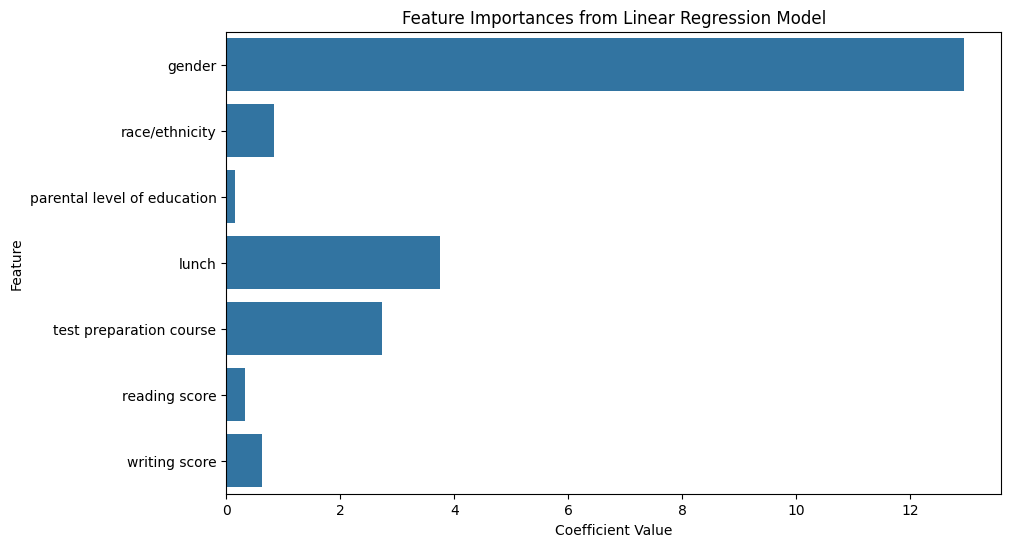

In [27]:
feature_importances = pd.Series(model.coef_, index=X_train.columns)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances from Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [32]:
gender = input("Masukkan Jenis Kelamin (female/male): ").lower() # Convert to lowercase
race_ethnicity = input("Masukkan Ras/Etnis (contoh: group A, group B, group C, group D, group E. Masukkan nama lengkap): ")
parental_education = input("Masukkan Tingkat Pendidikan Orang Tua (some high school, high school, some college, associate's degree, bachelor's degree, master's degree): ")
lunch = input("Masukkan Jenis Makan Siang (standard/free/reduced): ")
test_preparation = input("Masukkan Status Kursus Persiapan Tes (none/completed): ")
reading_score = int(input("Masukkan Reading Score: "))
writing_score = int(input("Masukkan Writing Score: "))

# Buat data baru dalam bentuk dictionary
data_baru = {
    'gender': gender,
    'race/ethnicity': race_ethnicity,
    'parental level of education': parental_education,
    'lunch': lunch,
    'test preparation course': test_preparation,
    'reading score': reading_score,
    'writing score': writing_score
}

new_df = pd.DataFrame([data_baru])
print(f"Data baru yang akan diprediksi:\n{new_df}\n")

# Lakukan encoding untuk kolom kategorikal
for col, encoder in encoders.items():
    new_df[col] = encoder.transform(new_df[col])

# Pastikan urutan kolom sesuai dengan X_train
new_df = new_df[X.columns]

print(f"Data baru setelah preprocessing:\n{new_df}\n")

# Lakukan prediksi
prediksi_math_score = model.predict(new_df)

# Tampilkan hasil
print("-" * 30)
print(f"Hasil Prediksi Math Score: {prediksi_math_score[0]:.2f} poin")
print("-" * 30)

Masukkan Jenis Kelamin (female/male): male
Masukkan Ras/Etnis (contoh: group A, group B, group C, group D, group E. Masukkan nama lengkap): group A
Masukkan Tingkat Pendidikan Orang Tua (some high school, high school, some college, associate's degree, bachelor's degree, master's degree): high school
Masukkan Jenis Makan Siang (standard/free/reduced): standard
Masukkan Status Kursus Persiapan Tes (none/completed): completed
Masukkan Reading Score: 66
Masukkan Writing Score: 78
Data baru yang akan diprediksi:
  gender race/ethnicity parental level of education     lunch  \
0   male        group A                 high school  standard   

  test preparation course  reading score  writing score  
0               completed             66             78  

Data baru setelah preprocessing:
   gender  race/ethnicity  parental level of education  lunch  \
0       1               0                            2      1   

   test preparation course  reading score  writing score  
0               

#Download File JOblib Untuk buat interface di streamlit


In [34]:
import joblib
from google.colab import files  # jika kamu jalankan di Google Colab

# Simpan model dan encoder
joblib.dump(model, 'linear_regression_model.joblib') # Mengganti 'rf' dengan 'model'
joblib.dump(encoders, 'encoders.joblib')
# joblib.dump(scaler, 'scaler.joblib') # Menghapus baris scaler karena tidak didefinisikan

print("✅ Model dan encoders berhasil disimpan!")

# Unduh file hasil training
files.download('linear_regression_model.joblib')
files.download('encoders.joblib')
# files.download('scaler.joblib') # Menghapus baris scaler karena tidak didefinisikan

print("📦 Semua file siap diunduh!")

✅ Model dan encoders berhasil disimpan!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📦 Semua file siap diunduh!
